In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O3','C3']
psi_dihedral=['C1','O3','C3','C4']

di_sugar=['GLA', 'GAL']
patterns1= ['GLA(*_*_)]-GAL(*_*_)', 'GLA(*_*_)-GAL(*_*_)','GLA(*_*_)]-[*]-GAL(*_*_)', 'GLA(*_*_)-[*]-GAL(*_*_)']
patterns2= ['DGalpa1-3DGalpb', 'DGalpa1-3]DGalpb', 'DGalpa1-3[*]DGalpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-3D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['146D', '146D', '1A14', '1ABR', '1ABR', '1AGM', '1AGM', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1AY2', '1B37', '1B5F', '1B5F', '1B5F', '1B5F', '1B5Q', '1BCS', '1BHG', '1BHG', '1BJI', '1BLF', '1BP8', '1BP8', '1BP8', '1BP8', '1BZB', '1C1Z', '1C39', '1C39', '1C3M', '1CAP', '1CF3', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CP8', '1CP8', '1CPO', '1CT1', '1CT1', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1D83', '1D83', '1DBG', '1DBO', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWA', '1DWF', '1DWF', '1DWG', '1DWG', '1DWH', '1DWH', '1DWI', '1DWI', '1DWJ', '1DWJ', '1DZH', '1E04', '1E05', '1E4K', '1E4K', '1E4M', '1E4M', '1E6Q', '1E6Q', '1E6S', '1E6S', '1E6X', '1E6X', '1E70', '1E70', '1E71', '1E71', '1E72', '1E72', '1E73', '1E73

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 77 
valid torsion1 and torsion2: (77, 77)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['6.C', '4.C'], ['4C1', '4C1'])
(['6.D', '4.D'], ['4C1', '4C1'])
(['3.E', '1.E'], ['4C1', '4C1'])
(['3.B', '1.B'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '-'])
(['3.I', '2.I'], ['4C1', '4C1'])
(['3.B', '1.B'], ['4C1', '4C1'])
(['3.B', '1.B'], ['4C1', '4C1'])
(['4.C', '2.C'], ['4C1', '-'])
(['4.D', '2.D'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['2.H', '1.H'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.A', '1.A'], ['4C1', '4C1'])
(['3.M', '2.M'], ['4C1', '4C1'])
(['3.J', '2.J'], ['4C1', '4C1'])
(['3.G', '2.G'], ['4C1', '4C1'])
(['3.O', '1.O'], ['4C1', '4C1'])
(['3.L', '1.L'], ['4C1', '4C1'])
(['3.I', '1.I'], ['4C1', '4C1'])
(['3.N', '1.N'], ['4C1', '4C1'])
(['3.H', '1.H'], ['4C1', '4C1'])
(['3.K', '1.K'], ['4C1', '4C1'])
(['3.E', '1.E'], ['4C1', '4C1'])
(['3.F', '1.F'], ['4C1', '4C1'])
(['3.C', '2.C'], ['4C1', '4C1'])
(['3.B', '1.B'], ['4C1', '4C1'])
(['3.B', '1.B'], ['4C1', '4C1'])
(['3.F', '2.F'

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//4b4r.pdb C GLA 6 C1
../../pdbs//4b4r.pdb C GAL 4 O3
2255 2241
Connection found between 2255 and 2241
../../pdbs//4b4r.pdb D GLA 6 C1
../../pdbs//4b4r.pdb D GAL 4 O3
2324 2310
Connection found between 2324 and 2310
../../pdbs//3p5g.pdb E GLA 3 C1
../../pdbs//3p5g.pdb E GAL 1 O3
4237 4223
Connection found between 4237 and 4223
../../pdbs//5mu9.pdb B GLA 3 C1
../../pdbs//5mu9.pdb B GAL 1 O3
2410 2396
Connection found between 2410 and 2396
../../pdbs//6pi0.pdb B GLA 2 C1
../../pdbs//6pi0.pdb B GAL 1 O3
5787 5783
Connection found between 5787 and 5783
../../pdbs//5jm1.pdb I GLA 3 C1
../../pdbs//5jm1.pdb I GAL 2 O3
4576 4572
Connection found between 4576 and 4572
../../pdbs//6n1b.pdb B GLA 3 C1
../../pdbs//6n1b.pdb B GAL 1 O3
3095 3081
Connection found between 3095 and 3081
../../pdbs//5d61.pdb B GLA 3 C1
../../pdbs//5d61.pdb B GAL 1 O3
2397 2383
Connection found between 2397 and 2383
../../pdbs//2ygm.pdb C GLA 4 C1
../../pdbs//2ygm.pdb C GAL 2 O3
5463 5449
Connection found betwe

In [13]:
output_df.to_csv('DGalpa1-3DGalpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGalpa1-3DGalpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,4b4r.pdb,C GLA 6 C2 C1 GAL 4 O3 C3,C GLA 6 C1 GAL 4 O3 C3 C4,177.3070,57.2440,"([GLA(6_C_), GAL(4_C_)], [31.66, 27.07])",GLA(6_C_)-[FUC(5_C_)]-GAL(4_C_)-NAG(3_C_)-GAL(...,LFucpa1-2[DGalpa1-3]DGalpb1-3DGlcpNAcb1-3DGalp...,"([6.C, 4.C], [4C1, 4C1])"
1,4b4r.pdb,D GLA 6 C2 C1 GAL 4 O3 C3,D GLA 6 C1 GAL 4 O3 C3 C4,181.9920,63.2370,"([GLA(6_D_), GAL(4_D_)], [31.24, 30.39])",GLA(6_D_)-[FUC(5_D_)]-GAL(4_D_)-NAG(3_D_)-GAL(...,LFucpa1-2[DGalpa1-3]DGalpb1-3DGlcpNAcb1-3DGalp...,"([6.D, 4.D], [4C1, 4C1])"
2,3p5g.pdb,E GLA 3 C2 C1 GAL 1 O3 C3,E GLA 3 C1 GAL 1 O3 C3 C4,172.9910,53.5545,"([GLA(3_E_), GAL(1_E_)], [33.01, 42.51])",GLA(3_E_)-[FUC(2_E_)]-GAL(1_E_),LFucpa1-2[DGalpa1-3]DGalpb1-ROH,"([3.E, 1.E], [4C1, 4C1])"
3,5mu9.pdb,B GLA 3 C2 C1 GAL 1 O3 C3,B GLA 3 C1 GAL 1 O3 C3 C4,177.3860,57.1492,"([GLA(3_B_), GAL(1_B_)], [7.1, 7.13])",GLA(3_B_)-[FUC(2_B_)]-GAL(1_B_),LFucpa1-2[DGalpa1-3]DGalpb1-ROH,"([3.B, 1.B], [4C1, 4C1])"
4,6pi0.pdb,B GLA 2 C2 C1 GAL 1 O3 C3,B GLA 2 C1 GAL 1 O3 C3 C4,157.4490,95.9001,"([GLA(2_B_), GAL(1_B_)], [26.15, 55.38])",GLA(2_B_)-GAL(1_B_),DGalpa1-3DGalpb1-ROH,"([2.B, 1.B], [4C1, -])"
...,...,...,...,...,...,...,...,...,...
72,5f7w.pdb,E GLA 6 C2 C1 GAL 4 O3 C3,E GLA 6 C1 GAL 4 O3 C3 C4,172.3140,64.2584,"([GLA(6_E_), GAL(4_E_)], [48.89, 44.54])",FUC(7_E_)-[GLA(6_E_)-[FUC(5_E_)]-GAL(4_E_)]-NA...,LFucpa1-2[DGalpa1-3]DGalpb1-3[LFucpa1-4]DGlcpN...,"([6.E, 4.E], [4C1, -])"
73,3zwe.pdb,E GLA 4 C2 C1 GAL 2 O3 C3,E GLA 4 C1 GAL 2 O3 C3 C4,260.4369,147.8850,"([GLA(4_E_), GAL(2_E_)], [40.83, 29.14])",GLA(4_E_)-[FUC(3_E_)]-GAL(2_E_)-BGC(1_E_),LFucpa1-2[DGalpa1-3]DGalpb1-4DGlcpb1-ROH,"([4.E, 2.E], [4C1, 4C1])"
74,3zwe.pdb,F GLA 4 C2 C1 GAL 2 O3 C3,F GLA 4 C1 GAL 2 O3 C3 C4,258.7630,132.6880,"([GLA(4_F_), GAL(2_F_)], [26.72, 20.7])",GLA(4_F_)-[FUC(3_F_)]-GAL(2_F_)-BGC(1_F_),LFucpa1-2[DGalpa1-3]DGalpb1-4DGlcpb1-ROH,"([4.F, 2.F], [4C1, 4C1])"
75,3r6k.pdb,B GLA 3 C2 C1 GAL 1 O3 C3,B GLA 3 C1 GAL 1 O3 C3 C4,135.7670,95.0518,"([GLA(3_B_), GAL(1_B_)], [101.87, 76.13])",GLA(3_B_)-[FUC(2_B_)]-GAL(1_B_),LFucpa1-2[DGalpa1-3]DGalpb1-ROH,"([3.B, 1.B], [4C1, -])"


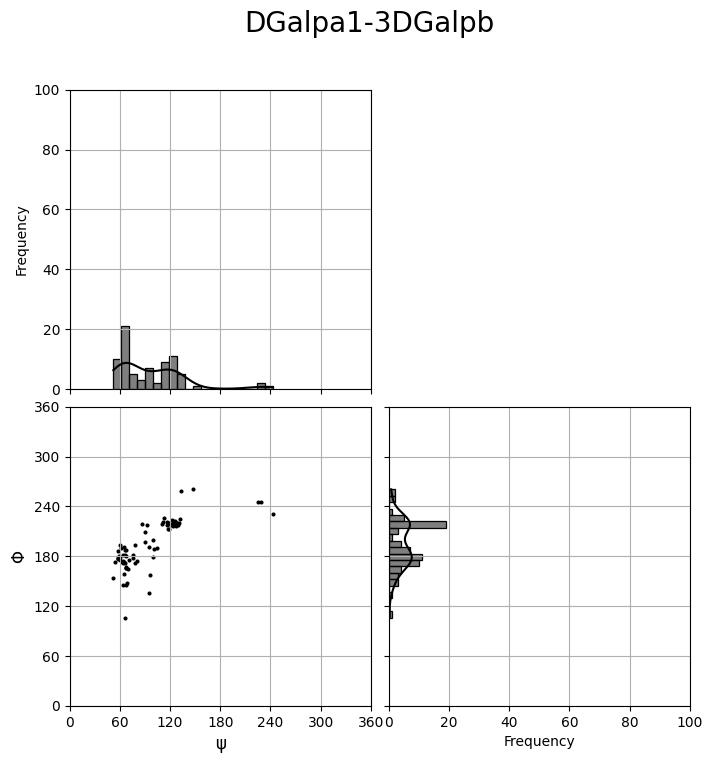

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGalpa1-3DGalpb',max_histogram_scale=100,step_histogram_tick=20)